In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(trainimages, trainlabels), (testimages,testlabels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
trainimages = trainimages/255
testimages = testimages/255

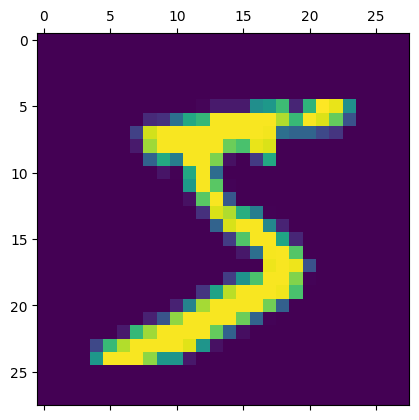

In [9]:
plt.matshow(trainimages[0])

In [27]:
model = keras.models.Sequential()

In [28]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.add(keras.layers.Dense(64, activation='relu'))

In [30]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(trainimages, trainlabels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.5111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9549 - loss: 0.1555
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9684 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9808 - loss: 0.0639
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9842 - loss: 0.0536
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9862 - loss: 0.0442
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0374
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0276


In [35]:
model.evaluate(testimages, testlabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1105


[0.09437263756990433, 0.9731000065803528]

In [33]:
predictions = model.predict(testimages)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
predictions[0]

array([5.3456756e-03, 3.5766013e-07, 1.9901618e-02, 3.2171136e-01,
       1.7374638e-06, 3.1233276e-04, 3.3657833e-12, 9.9987358e-01,
       9.7650448e-03, 1.5628664e-02], dtype=float32)

In [36]:
predictionlabels = [np.argmax(i) for i in predictions]

In [37]:
cm = tf.math.confusion_matrix(labels=testlabels, predictions=predictionlabels)

Text(95.72222222222221, 0.5, 'Truth')

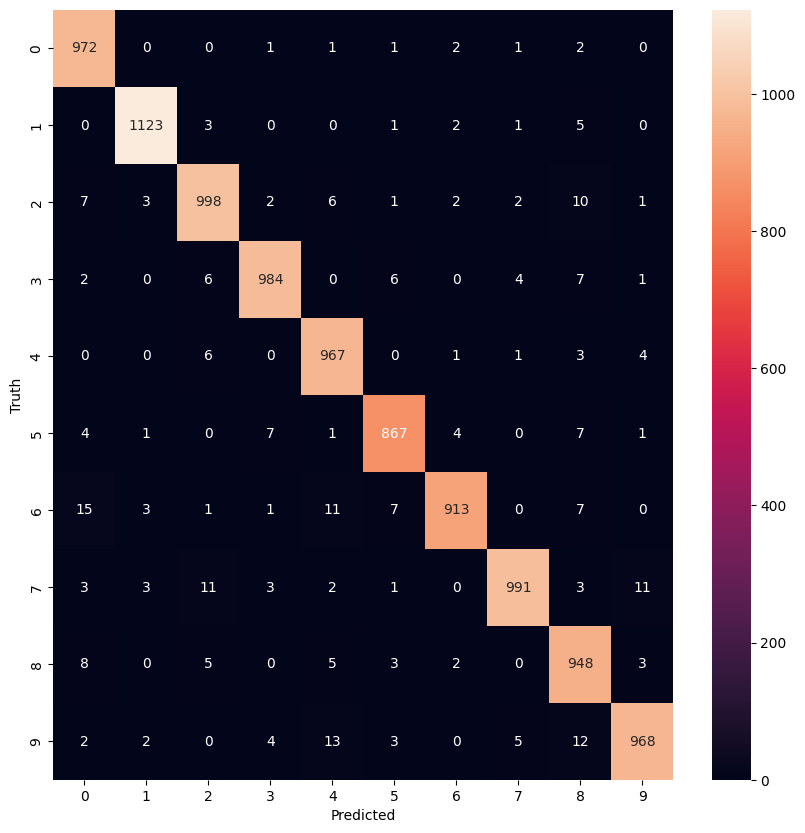

In [38]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')